<h4>Import Libraries</h4>

In [ ]:
import pandas as pd

<h4>Import Dataset</h4>

In [2]:
dataset=pd.read_csv("bill_authentication.csv")
dataset.Class=dataset.Class.replace(to_replace=[0,1], value=['no', 'yes'])

<h4>Seprate Independent and Dependentent Columns from Dataset</h4>

In [3]:

X=dataset.iloc[:,0:4].values
y=dataset.iloc[:,-1]
feature_names=['Variance', 'Skewness', 'Curtosis', 'Entropy']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<h4>Fitting Decision tree classifier to the Training set</h4>

In [5]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

<h4>Model Evalution</h4>

In [6]:
from sklearn import metrics
print("Classification Report:",metrics.classification_report(y_test,y_pred))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))


Classification Report:              precision    recall  f1-score   support

         no       1.00      0.99      0.99       157
        yes       0.98      1.00      0.99       118

avg / total       0.99      0.99      0.99       275

Confusion Matrix:
 [[155   2]
 [  0 118]]


<h4>Display tree</h4>

In [13]:

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


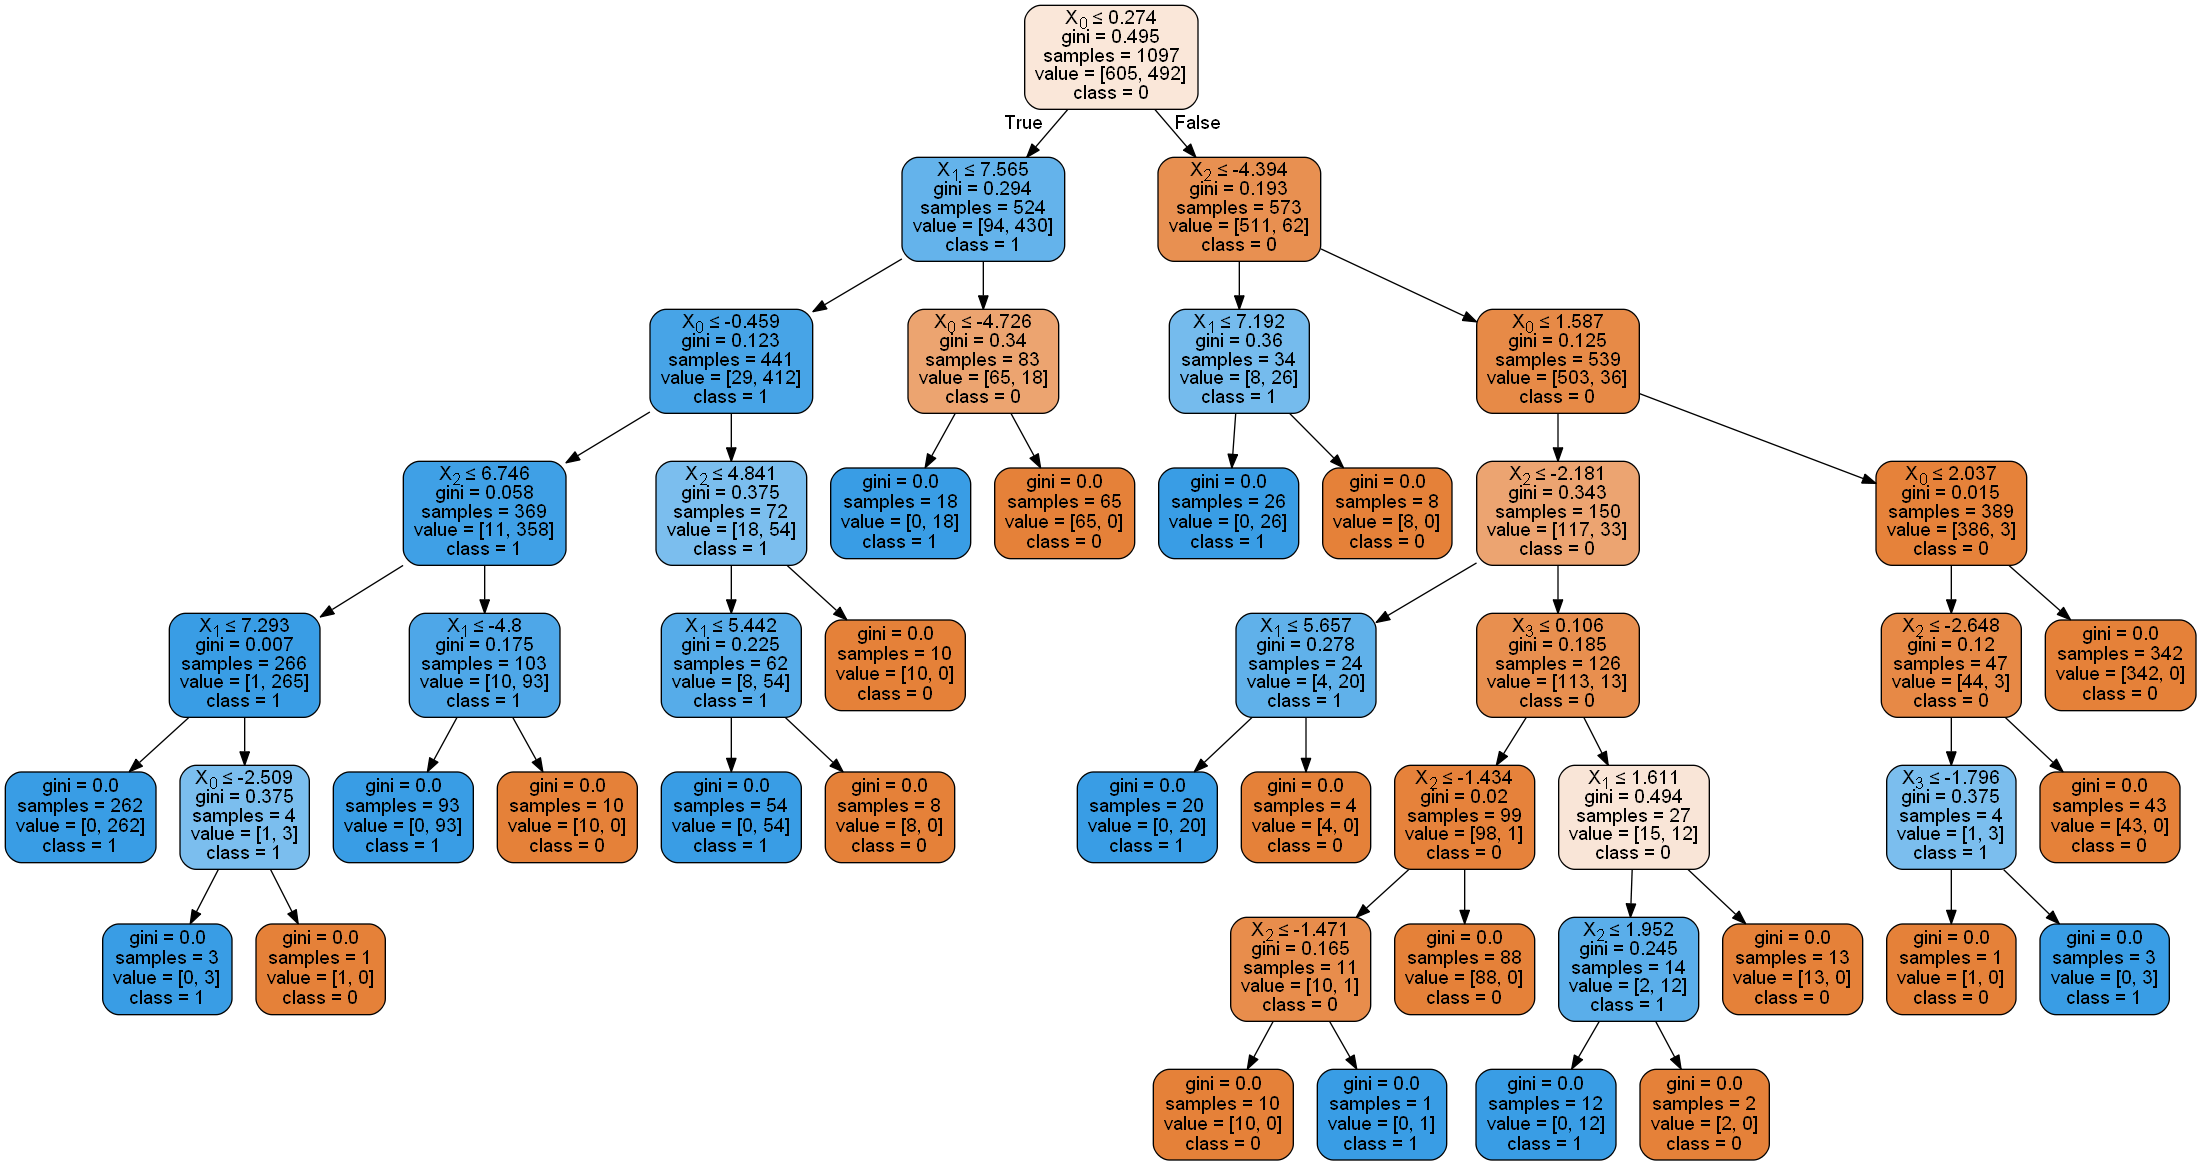

In [14]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, 
                class_names=['0','1'],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())